***

# @realDonaldTrump: A Sentiment and Network Analysis  

> ### IS620 Final Project, December 19, 2016

> Bryant Chang, Tom Detzel, Sandipayan Nandi and Erik Nylander


***

## Introduction and Findings


One of the hallmarks of the 2016 presidential election was billionaire Donald Trump's use of Twitter to speak "directly" to the voters. Trump's unfiltered style and the caustic nature of this election led many pundits to label it the most negative election in modern history. Did Trump's flamboyant use of Twitter contribute to that atmosphere? Were his tweets negative, positive or in-between? We used the methods learned in IS620 to approach these questions analytically by performing parallel sentiment and network analyses of Trump's Twitter activity and friends.  

**Findings:** Our [sentiment analysis](#Sentiment_Analysis) shows that **most of Trump's Tweets expressed a positive sentiment**. However, his **negative Tweets were more likely to be spread around** by others in his network as favorites or re-Tweets. Trump's Tweets also became **slightly more positive after he won**. Overall, the sentiment of Twitter users who re-Tweeted or replied to Trump's Tweets was positive or neutral. 

- Among Trump's 3,212 tweets, **53 percent were positive or extremely positive, while 26 percent were negative or extremely negative.**  
- Among 189 post-election Tweets, **59 percent were positive or extremely positive and 24 percent were negative or extremely negative.**  
- Of 130,047 replies to and re-Tweets of Trump Tweets, **43 percent were positive, 34 percent were neutral, and 23 percent were negative.**
- The **mean frequency for negative Trump re-Tweets was 23 percent higher than for positive** Trump re-Tweets.  

Our [network analysis](#Network_Analysis) shows that, **contrary to a firehose of publicity linking Trump the alt-right, his network of Twitter friends and their followers is primarily made of mainstream conservative media figures**, chief among them the talk show host Laura Ingraham, who is under consideration to be named White House press secretary. Network centrality measures place Ingraham along with Fox News personalities Bill O'Reilly, Eric Bolling and Greta Susteren at the top of among the top influencers in Trump's network of Twitter friends. **Ingraham scores highest in betwenness, Eigenvector and degree centrality.**

***

> **Index**
>  
> 1.0 [Mining Twitter](#Minning_Twitter)  
> 2.0 [Sentiment Analysis](#Sentiment_Analysis)  
> 3.0 [Network Analysis](#Network_Analysis)  
> Appendix A: [Tweet Data Structure](#Appendix_A)  
> Appendix B: [Twitter User Data Structure](#Appendix_B)  
> Appendix C: [Twitter Download Scripts](#Appendix_C)  
> Appendix D: [Get Friend Profiles](#Appendix_D)


***

## 1. Mining Twitter <a id='Minning_Twitter'></a>

Twitter is the famous social network that allows users to send messages of 140 characters or less (now, messages, called "Tweets", can be longer and include photos, videos and other visuals). Users can choose "friends" and "follow" other users, building a network that can get quite large. User names begin with the "@" symbol: @realDonaldTrump, the president-elect's handle, has 40 other "friends" (users whose Twitter feed he follows) and nearly 18 million "followers" (users who follow his tweets).
  
Although messages are limited to just a handful of words, the metadata behind Twitter is extremely rich. A single Tweet has 23 attributes, including data such as the user name, ID, creation date, whether and how many times the Tweet was re-Tweeted (forwarded by other users), etc. User profiles are similarly complex, with 42 attributes including a users home location, full name, photo, and more.

Using [Twitter's API](https://dev.twitter.com/docs), all this information plus a user's past Tweets can be harvested, as can the profiles and Tweets of friends and followers. This rich store of data can be used to create a potentially exhaustive profile of the user's network and to measure the relative influence of the user and other nodes (users).  
  
Sample tweet and user profiles are shown in the next two cells.


### 1.1 Tweet attributes
  
The actual 140-character content of a Tweet is stored in the attribute "text." Other attributes include the user who Tweeted and how many times the Tweet was re-Tweeted.  

[u'contributors',  
 u'truncated',  
 u'text',  
 u'is_quote_status',  
 u'in_reply_to_status_id',  
 u'id',  
 u'favorite_count',  
 u'source',  
 u'retweeted',  
 u'coordinates',  
 u'entities',  
 u'in_reply_to_screen_name',  
 u'in_reply_to_user_id',  
 u'retweet_count',  
 u'id_str',  
 u'favorited',  
 u'user',  
 u'geo',  
 u'in_reply_to_user_id_str',  
 u'lang',  
 u'created_at',  
 u'in_reply_to_status_id_str',  
 u'place']  


### 1.2 User Profile  
Metadata for Trump follower Rafiqul Hoque, who lists Chittagong, Bangladesh, as his home location. Hoque has 162 friends (users he is following) and 25 followers (users who follow him).    
  
(808279467021901826,  
 {u'contributors_enabled': False,  
  u'created_at': u'Mon Dec 12 11:56:56 +0000 2016',  
  u'default_profile': True,  
  u'default_profile_image': False,  
  u'description': u'',  
  u'entities': {u'description': {u'urls': []}},  
  u'favourites_count': 22,  
  u'follow_request_sent': False,  
  u'followers_count': 25,  
  u'following': False,  
  u'friends_count': 162,  
  u'geo_enabled': False,  
  u'has_extended_profile': True,  
  u'id': 808279467021901826,  
  u'id_str': u'808279467021901826',  
  u'is_translation_enabled': False,  
  u'is_translator': False,  
  u'lang': u'en',  
  u'listed_count': 0,  
  u'location': u'Chittagong, Bangladesh',  
  u'name': u'Rafiqul Hoque',  
  u'notifications': False,  
  u'profile_background_color': u'F5F8FA',  
  u'profile_background_image_url': None,  
  u'profile_background_image_url_https': None,  
  u'profile_background_tile': False,  
  u'profile_image_url': u'http://pbs.twimg.com/profile_images/810099062498201601/rzCtS9W-_normal.jpg',  
  u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/810099062498201601/rzCtS9W-_normal.jpg',  
  u'profile_link_color': u'1DA1F2',  
  u'profile_sidebar_border_color': u'C0DEED',  
  u'profile_sidebar_fill_color': u'DDEEF6',  
  u'profile_text_color': u'333333',  
  u'profile_use_background_image': True,  
  u'protected': False,  
  u'screen_name': u'RafiqulHoque17',  
  u'statuses_count': 0,  
  u'time_zone': None,  
  u'translator_type': u'none',  
  u'url': None,  
  u'utc_offset': None,  
  u'verified': False})  

### 1.4 Getting Twitter Data
  
Getting data from Twitter requires a user account and accessing the API. For non-commercial users, Twitter allows a maximum download of 5,000 records, after which access to the API is cut off for 15 minutes. Though Trump has few friends, they have many followers. Downloading our data corpus required more than 8 hours under the Twitter constraints. 

We used the Python packages twitter and Tweepy to access the API, adapting methods from the following sources:  
  
- [Mining The Social Web (Russell)](https://github.com/ptwobrussell/Recipes-for-Mining-Twitter)
- [Generating a Network Graph from Twitter (Kay)](http://mark-kay.net/2014/08/15/network-graph-of-twitter-followers/#disqus_thread)
- [Twitter API Documentation and sample code](https://dev.twitter.com/streaming/overview/request-parameters#track)
- [Vader Sentiment Analysis Algorithm](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)


***

## 2. Sentiment Analysis of Trump Tweets <a id='Sentiment_Analysis'></a>

To determine the sentiment of the tweets we elected to use the [Vader Sentiment Analysis Algorithm](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf) developed by Hutto and Gilbert at Georgia Tech. This algorithim is included in the Natural Language Tool Kit and has been shown to outperform many other sentiment analysis tools on social media text.

We examined three different data slices:

**1 -- All of Donald Trump's tweets from Febuary of 2016 until December of 2016, a total 3,212 tweets.** We found  1,711 positive tweets, 670 neutral tweets, and 831 negative tweets. Mr. Trump's Twitter was positive 53.26% of the time and negative only 25% of the time. In our analysis of the reach of the tweets as measured by favorites and retweets we do find an interesting result. While the majority of Mr. Trump's tweets are positive the tweets that were, on average, favorited and retweeted the most were the negative tweets. Given that his negative tweets recieved more engagment, this could easily explain why @realDonaldTrump was precived in an overall negative light.  
    
**2 -- Mr. Trump's tweets up to the election and then Mr. Trump's Tweets after the election.** We tried to determine if there was a change in the tone between candidate and President Elect. Before the election Mr. Trump was positive 52.89% of the time; after the election he was positive 59.25% of the time, a modest change.  
  
**3 -- All the @resopnses to Mr. Trump's Tweets.** We looked to see if the sentiment of Trump's followers aligned with his. A plurality of these tweets were positive -- but markedly less positive than Mr. Trump's tweets. Overall the responses to Mr. Trump were positive 43.12% of the time, negative 23.92% of the time, and neutral 36.69% of the time.
  
  
> *Citation for the Vader Algorithm:*  

> *Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.*


### 2.1 Loading data
  
We downloaded the data using twitter and Tweepy, then imported from .csv files into pandas for processing in Python.


In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt

In [3]:
trump_tweets = pd.read_csv('DATA620_Group_Projects/data/trump/@realDonaldTrump_tweets.csv')
at_replies = pd.read_csv('DATA620_Group_Projects/data/trump/realDonaldTrump_M_tweets.csv')
trump_tweets['created_at'] = pd.to_datetime(trump_tweets['created_at'], format='%m/%d/%y %H:%M')

#### 2.1.1 Sample Tweets dataframe

In [3]:
trump_tweets.head()

,id,created_at,text,retweet_count,favorite_count
0,8.095720e+17,2016-12-16 01:32:00,"Thank you Pennsylvania! Together, we are going...",4274,16241
1,8.095250e+17,2016-12-15 22:27:00,"Join me in Mobile, Alabama on Sat. at 3pm! #Th...",3422,12084
2,8.094040e+17,2016-12-15 14:24:00,"If Russia, or some other entity, was hacking, ...",30971,91269
3,8.093900e+17,2016-12-15 13:28:00,The media tries so hard to make my move to the...,11105,46734
4,8.093850e+17,2016-12-15 13:09:00,Thank you to Time Magazine and Financial Times...,8772,44509


#### 2.1.2 Sample replies dataframe

In [4]:
at_replies.head()

,created_at,in_reply_to_status_id_str,text,id,in_reply_to_user_id
0,Sat Dec 17 16:13:23 +0000 2016,8.101217e+17,@realDonaldTrump you are a MORON! I wish that ...,8.101559e+17,25073877.0
1,Sat Dec 17 16:13:23 +0000 2016,NaN,"RT @realDonaldTrump: Mobile, Alabama today at ...",8.101559e+17,NaN
2,Sat Dec 17 16:13:23 +0000 2016,8.101217e+17,@realDonaldTrump our president elect is now a...,8.101559e+17,25073877.0
3,Sat Dec 17 16:13:23 +0000 2016,8.101217e+17,@realDonaldTrump @Zeke1120 The US in 2016 ele...,8.101559e+17,25073877.0
4,Sat Dec 17 16:13:23 +0000 2016,NaN,"RT @realDonaldTrump: Join me in Mobile, Alabam...",8.101559e+17,NaN


### 2.2  Extracting Tweet Text and Running Sentiment Analysis for All Tweets

#### 2.2.1 Sentiment Scale  
First we build a function to score each tweet against 5 sentiment levels. Each level is .4 units wide.

In [4]:
# Scale for determing the 5 sentiment categories, each is even width
def scale (score):
    if score <= -.6:
        return "extremely_negative"
    if score <= -.2:
        return "negative"
    if score <= .2:
        return "neutral"
    if score <= .6:
        return "positive"
    if score <= 1:
        return "extremely_positive"

#### 2.2.2 Sentiment Analyzer

We next create the Sentiment Analyzer object used to find the overall sentiment of each of the tweets. The *score_tweets* function accepts a list of tweets and returns the overall score on the five point scale.

In [5]:
# Creating the sentiment analyzer object
sid = SentimentIntensityAnalyzer()

In [6]:
def score_tweets(tweets):
    # Determing the sentiment and sentiment score for each of the tweets.
    sentiment = []
    score = []
    for tweet in tweets:
        ss = sid.polarity_scores(str(tweet))
        sentiment.append(scale(ss['compound']))
        score.append(ss['compound'])
    
    return sentiment, score

sentiment, score = score_tweets(trump_tweets.text)    

trump_tweets['sentiment'] = sentiment
trump_tweets['score'] = score

#### 2.2.3 Results dataframe
  
We create a dataframe to contain the results with a score and sentiment category for each tweet.

In [7]:
trump_tweets.head()

,id,created_at,text,retweet_count,favorite_count,sentiment,score
0,8.095720e+17,2016-12-16 01:32:00,"Thank you Pennsylvania! Together, we are going...",4274,16241,extremely_positive,0.8367
1,8.095250e+17,2016-12-15 22:27:00,"Join me in Mobile, Alabama on Sat. at 3pm! #Th...",3422,12084,positive,0.3595
2,8.094040e+17,2016-12-15 14:24:00,"If Russia, or some other entity, was hacking, ...",30971,91269,extremely_negative,-0.6322
3,8.093900e+17,2016-12-15 13:28:00,The media tries so hard to make my move to the...,11105,46734,negative,-0.2865
4,8.093850e+17,2016-12-15 13:09:00,Thank you to Time Magazine and Financial Times...,8772,44509,extremely_positive,0.8777


### 2.3 Sentiment of Trump's Tweets

With Trump's Tweets classified by sentiment we can do some basic descriptive analysis of his communications.
Among Trumps 3,212 tweets, **53 percent were positive or extremely positive**, while **26 percent were negative or extremely negative**.

#### 2.3.1 Count of Tweets by Sentiment Class

In [12]:
# Generating counts for each of the sentiment classes of tweets
counts = trump_tweets.groupby(['sentiment'])['score'].count()
counts

sentiment
extremely_negative    393
extremely_positive    833
negative              438
neutral               670
positive              878
Name: score, dtype: int64

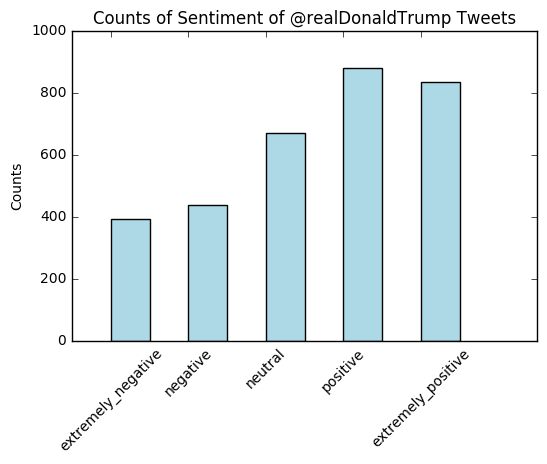

In [8]:
# Plotting the classes
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 5
sentiment_count = [393, 438, 670, 878, 833]

## necessary variables
ind = np.arange(N)
width = .5

## the bars
rects = ax.bar(ind, sentiment_count, width, 
               color = 'lightblue')

## axes and labels
ax.set_xlim(-width, len(ind)+width)
ax.set_ylim(0, 1000)
ax.set_ylabel('Counts')
ax.set_title('Counts of Sentiment of @realDonaldTrump Tweets')
xTickMarks = ['extremely_negative', 'negative', 'neutral',
              'positive', 'extremely_positive']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.show()

### 2.4 Pre- Versus Post-Election Tweets

We find that Trump became more negative after winning, although the sample of Tweets is smaller. Among 189 post-election Tweets, **59 percent were negative or extremely negative** and **26 percent were positive or extremely positive.**

In [9]:
# Slicing the tweets into pre- and post-election
pre_election = trump_tweets[trump_tweets['created_at'] <= '2016-11-8']
post_election = trump_tweets[trump_tweets['created_at'] > '2016-11-8']

In [10]:
# Generating counts for each of the sentiment classes of tweets
pre_counts = pre_election.groupby(['sentiment'])['score'].count()
post_counts = post_election.groupby(['sentiment'])['score'].count()

#### 2.4.1 Pre-Election Tweets

In [11]:
# pre-election sentiment counts
pre_counts

sentiment
extremely_negative    380
extremely_positive    768
negative              406
neutral               638
positive              831
Name: score, dtype: int64

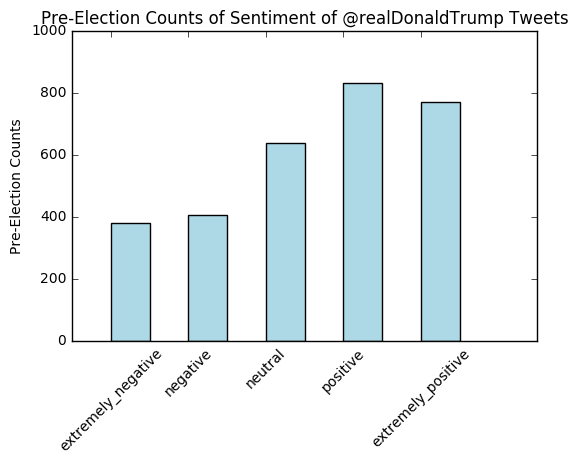

In [12]:
# Plotting the classes
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 5
sentiment_count = [380, 406, 638, 831, 768]

## necessary variables
ind = np.arange(N)
width = .5

## the bars
rects = ax.bar(ind, sentiment_count, width, 
               color = 'lightblue')

## axes and labels
ax.set_xlim(-width, len(ind)+width)
ax.set_ylim(0, 1000)
ax.set_ylabel('Pre-Election Counts')
ax.set_title('Pre-Election Counts of Sentiment of @realDonaldTrump Tweets')
xTickMarks = ['extremely_negative', 'negative', 'neutral',
              'positive', 'extremely_positive']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.show()

#### 2.4.2 Post-Election Tweets

In [13]:
# post election sentiment counts
post_counts

sentiment
extremely_negative    13
extremely_positive    65
negative              32
neutral               32
positive              47
Name: score, dtype: int64

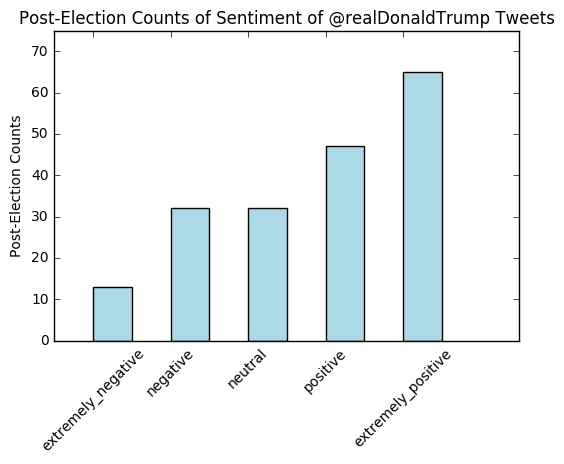

In [14]:
# Plotting the classes
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 5
sentiment_count = [13, 32, 32, 47, 65]

## necessary variables
ind = np.arange(N)
width = .5

## the bars
rects = ax.bar(ind, sentiment_count, width, 
               color = 'lightblue')

## axes and labels
ax.set_xlim(-width, len(ind)+width)
ax.set_ylim(0, 75)
ax.set_ylabel('Post-Election Counts')
ax.set_title('Post-Election Counts of Sentiment of @realDonaldTrump Tweets')
xTickMarks = ['extremely_negative', 'negative', 'neutral',
              'positive', 'extremely_positive']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.show()

### 2.5 Most Positive and Most Negative Tweets

Overall scores tell only part of Trump's story. We examined the most positive and most negative Tweets to get a clearer picture of how sentiment is spread. 

#### 2.5.1 Most-Positive and Most-Negative Tweets from @realDonaldTrump

In [15]:
trump_tweets.ix[trump_tweets.score.argmax()].text

'Governor John Kasich of the GREAT, GREAT, GREAT State of Ohio called to congratulate me on the win. The people of Ohio were incredible!'

In [16]:
trump_tweets.ix[trump_tweets.score.argmin()].text

'General John Allen, who I never met but spoke against me last night, failed badly in his fight against ISIS. His record = BAD  #NeverHillary'

#### 2.5.2 What was Favorited and Retweated the Most

Although Mr. Trump's tweets were, in general, more positive, that impression is qualified when the reach is taken into account. Negative tweets were shared more widely by a large margin. Negative and extremely negative tweets had higher mean favorite scores. They also had higher average re-Tweet counts than did positive Tweets.

We conclude that Mr. Trump's negative Tweets were more influential than his positive ones, adding to the perception that the 2016 election was overwhelmingly nasty in tone.

##### 2.5.3 How Many Favorites did Each Sentiment Class Recieve?

In [17]:
mu_favs = trump_tweets.groupby(['sentiment'])['favorite_count'].mean()
mu_favs

sentiment
extremely_negative    26737.743003
extremely_positive    26184.487395
negative              28296.239726
neutral               21418.810448
positive              21472.341686
Name: favorite_count, dtype: float64

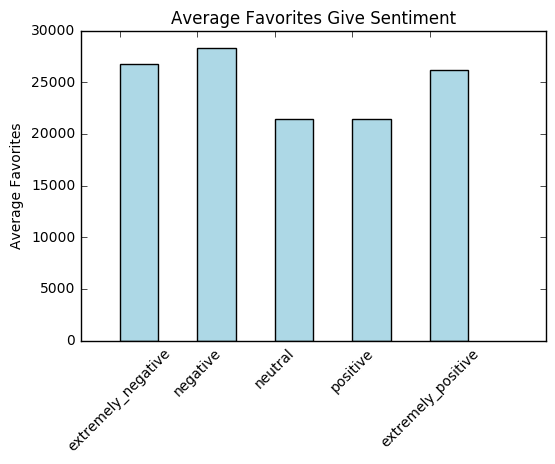

In [18]:
# Plotting the classes
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 5
mean_fav = [26737.743003, 28296.239726, 21418.810448, 21472.341686, 26184.487395]

## necessary variables
ind = np.arange(N)
width = .5

## the bars
rects = ax.bar(ind, 
               mean_fav, 
               width, 
               color = 'lightblue')

## axes and labels
ax.set_xlim(-width, len(ind)+width)
ax.set_ylim(0, 30000)
ax.set_ylabel('Average Favorites')
ax.set_title('Average Favorites Give Sentiment')
xTickMarks = ['extremely_negative', 'negative', 'neutral',
              'positive', 'extremely_positive']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.show()

#### 2.5.3.1 Positive Trump Tweet

In [19]:
print trump_tweets.ix[trump_tweets.favorite_count.argmax()].sentiment
print trump_tweets.ix[trump_tweets.favorite_count.argmax()].text

positive
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before


##### 2.5.4 How Many Re-Tweets did each Sentiment Class Recieve?  
The mean re-Tweet count for negative Trump re-Tweets was **23 percent higher** than for positive Trump re-Tweets.

In [20]:
mu_retweet = trump_tweets.groupby(['sentiment'])['retweet_count'].mean()
mu_retweet

sentiment
extremely_negative     9970.674300
extremely_positive     8780.123649
negative              10376.726027
neutral                8882.940299
positive               7755.610478
Name: retweet_count, dtype: float64

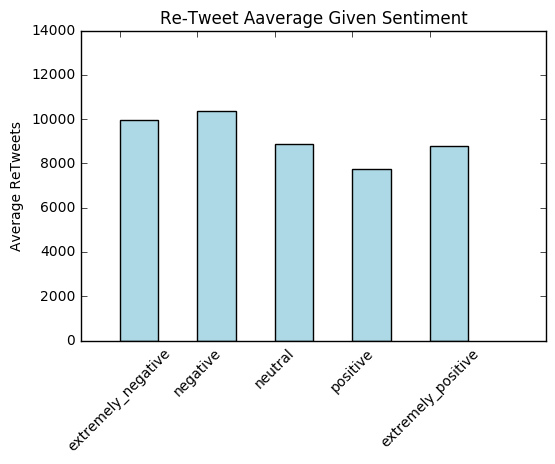

In [21]:
# Plotting the classes
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 5
mean_retweet = [9970.674300, 10376.726027, 8882.940299, 7755.610478, 8780.123649]

## necessary variables
ind = np.arange(N)
width = .5
error_config = {'ecolor': '0.3'}

## the bars
rects = ax.bar(ind, 
               mean_retweet, 
               width, 
               color = 'lightblue')

## axes and labels
ax.set_xlim(-width, len(ind)+width)
ax.set_ylim(0, 14000)
ax.set_ylabel('Average ReTweets')
ax.set_title('Re-Tweet Aaverage Given Sentiment')
xTickMarks = ['extremely_negative', 'negative', 'neutral',
              'positive', 'extremely_positive']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.show()

#### 2.5.4.1 Extremely Positive Trump Tweet

In [22]:
print trump_tweets.ix[trump_tweets.retweet_count.argmax()].sentiment
print trump_tweets.ix[trump_tweets.retweet_count.argmax()].text

extremely_positive
TODAY WE MAKE AMERICA GREAT AGAIN!


#### 2.5.5 Most Positive and Negative Tweets Pre-Election 

In [23]:
pre_election.ix[pre_election.score.argmax()].text

'"@PaulaDuvall2: We\'re all enjoying you, as well, Mr. T.! You\'ve inspired Hope and a Positive Spirit throughout America! God bless you!" Nice'

In [24]:
pre_election.ix[pre_election.score.argmin()].text

'General John Allen, who I never met but spoke against me last night, failed badly in his fight against ISIS. His record = BAD  #NeverHillary'

#### 2.5.6 Most Positive and Negative Tweets Post-Election

In [49]:
post_election.ix[post_election.score.argmax()].text

'Governor John Kasich of the GREAT, GREAT, GREAT State of Ohio called to congratulate me on the win. The people of Ohio were incredible!'

In [50]:
post_election.ix[post_election.score.argmin()].text

'"@FiIibuster: @jeffzeleny Pathetic - you have no sufficient evidence that Donald Trump did not suffer from voter fraud, shame! Bad reporter.'

### 2.6 Sentiment Analyisis of @replies to @realDonaldTrump

In Twitter, it's possible to reply directly to a user's Tweet (Trump's in this case) or to insert a comment in a re-Tweet while forwarding the original Tweet. We looked at replies and re-tweets for Mr. Trump's account, though we were limited to just a few weeks' worth of data by Twitter's API. We can see from the first tweet in our data set that there are some edge case statments that may befuddle even the best sentiment analyzer. In that reply, the user calls Mr. Trump a moron, but the remaining text is uses positive words.

In [25]:
sentiment, score = score_tweets(at_replies.text)    

at_replies['sentiment'] = sentiment
at_replies['score'] = score

#### 2.6.1 Sample replies and re-Tweets

In [54]:
at_replies.head()

,created_at,in_reply_to_status_id_str,text,id,in_reply_to_user_id,sentiment,score
0,Sat Dec 17 16:13:23 +0000 2016,8.101217e+17,@realDonaldTrump you are a MORON! I wish that ...,8.101559e+17,25073877.0,positive,0.5986
1,Sat Dec 17 16:13:23 +0000 2016,NaN,"RT @realDonaldTrump: Mobile, Alabama today at ...",8.101559e+17,NaN,positive,0.4995
2,Sat Dec 17 16:13:23 +0000 2016,8.101217e+17,@realDonaldTrump our president elect is now a...,8.101559e+17,25073877.0,positive,0.5859
3,Sat Dec 17 16:13:23 +0000 2016,8.101217e+17,@realDonaldTrump @Zeke1120 The US in 2016 ele...,8.101559e+17,25073877.0,neutral,0.0000
4,Sat Dec 17 16:13:23 +0000 2016,NaN,"RT @realDonaldTrump: Join me in Mobile, Alabam...",8.101559e+17,NaN,positive,0.3595


#### 2.6.2 Sentiment counts of replies, re-Tweets  
  
Of 130,047 replies to and re-Tweets of Trump Tweets, **43 percent were positive, 34 percent were neutral, and 23 percent were negative.** 

In [26]:
at_counts = at_replies.groupby(['sentiment'])['score'].count()
at_counts

sentiment
extremely_negative     9884
extremely_positive    20659
negative              19306
neutral               44782
positive              35416
Name: score, dtype: int64

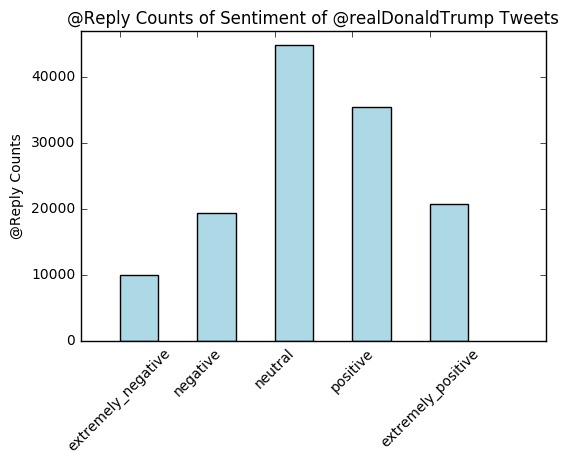

In [27]:
# Plotting the classes
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 5
sentiment_count = [9884, 19306, 44782, 35416, 20659]

## necessary variables
ind = np.arange(N)
width = .5

## the bars
rects = ax.bar(ind, sentiment_count, width, 
               color = 'lightblue')

## axes and labels
ax.set_xlim(-width, len(ind)+width)
ax.set_ylim(0, 47000)
ax.set_ylabel('@Reply Counts')
ax.set_title('@Reply Counts of Sentiment of @realDonaldTrump Tweets')
xTickMarks = ['extremely_negative', 'negative', 'neutral',
              'positive', 'extremely_positive']
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

plt.show()

#### 2.6.3 Most Positive and Negative @replies and re-Tweets

In [28]:
at_replies.ix[at_replies.score.argmax()].text

".@realDonaldTrump LOVE IS LOVE IS LOVE IS LOVE IS LOVE IS LOVE IS LOVE IS LOVE THAT'S WHY @HillaryClinton RECEIVED\xe2\x80\xa6 https://t.co/71ZX0zc5FN"

In [29]:
at_replies.ix[at_replies.score.argmin()].text

"@realDonaldTrump YOU'RE A FRAUD. YOU'RE A FRAUD. YOU'RE A FRAUD. YOU'RE A FRAUD. YOU'RE A FRAUD. YOU'RE A FRAUD. YOU'RE A FRAUD. FRAUD"

***

## 3. Network Analysis of @realDonaldTrump <a id='Network_Analysis'></a>

Using the tools and methods mentioned above, we downloaded the user profiles of all 40 Trump "friends" -- the Twitter users he follows. For each Trump friend, we downloaded the Twitter IDs of 5,000 followers. The profiles include a follower count for each of Trump's friends. That provides a way to measure their relative influence, weight edges in our analysis and prune our network graph.  

When Trump tweets and his followers re-Tweet, it vastly expands the range of his communication. Because Trump has nearly 18 million followers, we limit our network analysis to his friends network. 
  
To simplify the presentation, code we used to download the data, create nodes and edges for a graph analysis, and plot the network with NetworkX is contained in the appendices. The following cells assume code in the appendices has been run and that the required Trump Twitter data is in the current Jupyter Notebook working directory in folders "followers/" and "twitter-users" and "twitter-network.csv". 

### 3.1 Trump's friends  
Among Trump's friends is a small group of his golf courses, and his children, each of whom have a negligible number of followers. They are screened out of the network for the sake of simplicity. Following is a complete list: 

#### 3.1.1 List of Twitter users Trump follows   


In [30]:
ls following/

AnnCoulter.csv       MELANIATRUMP.csv     TrumpWaikiki.csv
CLewandowski_.csv    MarkBurnettTV.csv    VinceMcMahon.csv
DRUDGE_REPORT.csv    MichaelCohen212.csv  ericbolling.csv
DanScavino.csv       MrsVanessaTrump.csv  foxandfriends.csv
DiamondandSilk.csv   TeamTrump.csv        foxnation.csv
DonaldJTrumpJr.csv   TiffanyATrump.csv    garyplayer.csv
EricTrump.csv        Trump.csv            greta.csv
GeraldoRivera.csv    TrumpCharlotte.csv   mike_pence.csv
IngrahamAngle.csv    TrumpChicago.csv     morningmika.csv
IvankaTrump.csv      TrumpDoral.csv       oreillyfactor.csv
JoeNBC.csv           TrumpGolf.csv        piersmorgan.csv
KatrinaCampins.csv   TrumpGolfDC.csv      realDonaldTrump.csv
KatrinaPierson.csv   TrumpGolfLA.csv      seanhannity.csv
LaraLeaTrump.csv     TrumpLasVegas.csv


### 3.2 Trump's most-connected friends
Friends with the most connections inside Trump's friends' network. Laura Ingraham, No. 1, is the conservative talk radio host being considered for the White House press secretary job. Eric Bolling is the conservative host of the evening Fox television talk show "The Five." In fact, with the exception of Vice President-Elect Mike Pence, Trump's most-connected friends are all conservative media commentators.

In [33]:
import operator

tdegrees = sorted(core.degree().items(), key=operator.itemgetter(1), reverse=True)
tdeg = pd.DataFrame(tdegrees, columns=['Friend', 'Degrees'])
tdeg.head(10)


,Friend,Degrees
0,IngrahamAngle,46
1,ericbolling,38
2,realDonaldTrump,33
3,oreillyfactor,24
4,JoeNBC,24
5,AnnCoulter,22
6,greta,21
7,seanhannity,16
8,foxandfriends,16
9,mike_pence,14


### 3.3 Centrality Measures for Trump network

The central importance of Ingraham and Bolling in Trump's network shows up in centrality statistics. Clearly Ingraham is plugged in. She has the highest **degree centrality** reflecting influence in outward connections; with the exception of Trump (who is the center of this network), she has the highest **closeness centrality**, or short distance to other Trump friends; Ingraham also has the highest **betweeness centrality**, quantifying the extent to which a friend is connected to other friends that are not connected to each other.

While Trump has been connected to Steve Bannon's Breitbart News and others in the alt-right movement, it's clear from his Twitter network that he is most solidly connected to mainstream conservative media.  
  
The code that follows calculates the centrality measures summarized in chart below. The centrality is clearly evident in the network plot, which shows clusters of directed edges emanating from Ingraham, Bolling and others with high centrality to other friends across the network.
  

In [34]:
## to get centrality and clustering measures, must convert to undirected graph
core_ud = core.to_undirected()
# Connected components are sorted in descending order of their size
core_components = list(net.connected_component_subgraphs(core_ud))

core_mc = core_components[0]

# Betweenness centrality
bet_cen = net.betweenness_centrality(core_ud)

# Closeness centrality
clo_cen = net.closeness_centrality(core_ud)

# Eigenvector centrality
eig_cen = net.eigenvector_centrality_numpy(core_ud)

# Degree centrality
deg_cen = net.degree_centrality(core_ud)

In [35]:
## utility function to get topmost nodes for each centrality function
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x, items[:top])

In [36]:
## get the top nodes
top_bet_cen = get_top_keys(bet_cen,10)
top_clo_cen = get_top_keys(clo_cen,10)
top_eig_cen = get_top_keys(eig_cen,10)
top_deg_cen = get_top_keys(deg_cen,10)

In [37]:
## smush them together to make a comparison chart
smush = np.hstack((top_bet_cen, top_clo_cen, top_eig_cen, top_deg_cen))

In [38]:
cent_measures=pd.DataFrame(smush, columns=['Friend', 'Betweenness', 'Friend', 'Closeness', 'Friend', 'Eigenvector', 'Friend', 'Degree'])

#### 3.3.1 Highest Centrality Measures for Trump friends

In [39]:
cent_measures[['Betweenness', 'Closeness', 'Eigenvector', 'Degree']] = cent_measures[['Betweenness', 'Closeness', 'Eigenvector', 'Degree']].astype('float64')
cent_measures.head()

,Friend,Betweenness,Friend,Closeness,Friend,Eigenvector,Friend,Degree
0,IngrahamAngle,0.370228,realDonaldTrump,0.546939,IngrahamAngle,0.425569,IngrahamAngle,0.335821
1,realDonaldTrump,0.237411,IngrahamAngle,0.519380,realDonaldTrump,0.319860,ericbolling,0.283582
2,ericbolling,0.233304,oreillyfactor,0.494465,ericbolling,0.300894,realDonaldTrump,0.171642
3,oreillyfactor,0.183355,brithume,0.457338,oreillyfactor,0.260630,oreillyfactor,0.171642
4,AnnCoulter,0.164693,ericbolling,0.448161,greta,0.208221,JoeNBC,0.164179


### 3.3 Network graph of Trump's friends  
The red node is Trump; green nodes are Trump friends with the largest groups of followers. The names identify followers of Trump's friends that also have large groups of followers themselves (even pro-Clinton comedian Bill Maher, with 6 million followers on Twitter.) For graphing purposes, nodes in the network are pruned to 135 from the initial 4,597.

g:  4597
core after node pruning:  213
core after edge pruning:  135
Trump 1
Not Trump 134
colourmap:  {'Trump': 'red', 'Not Trump': 'green'}


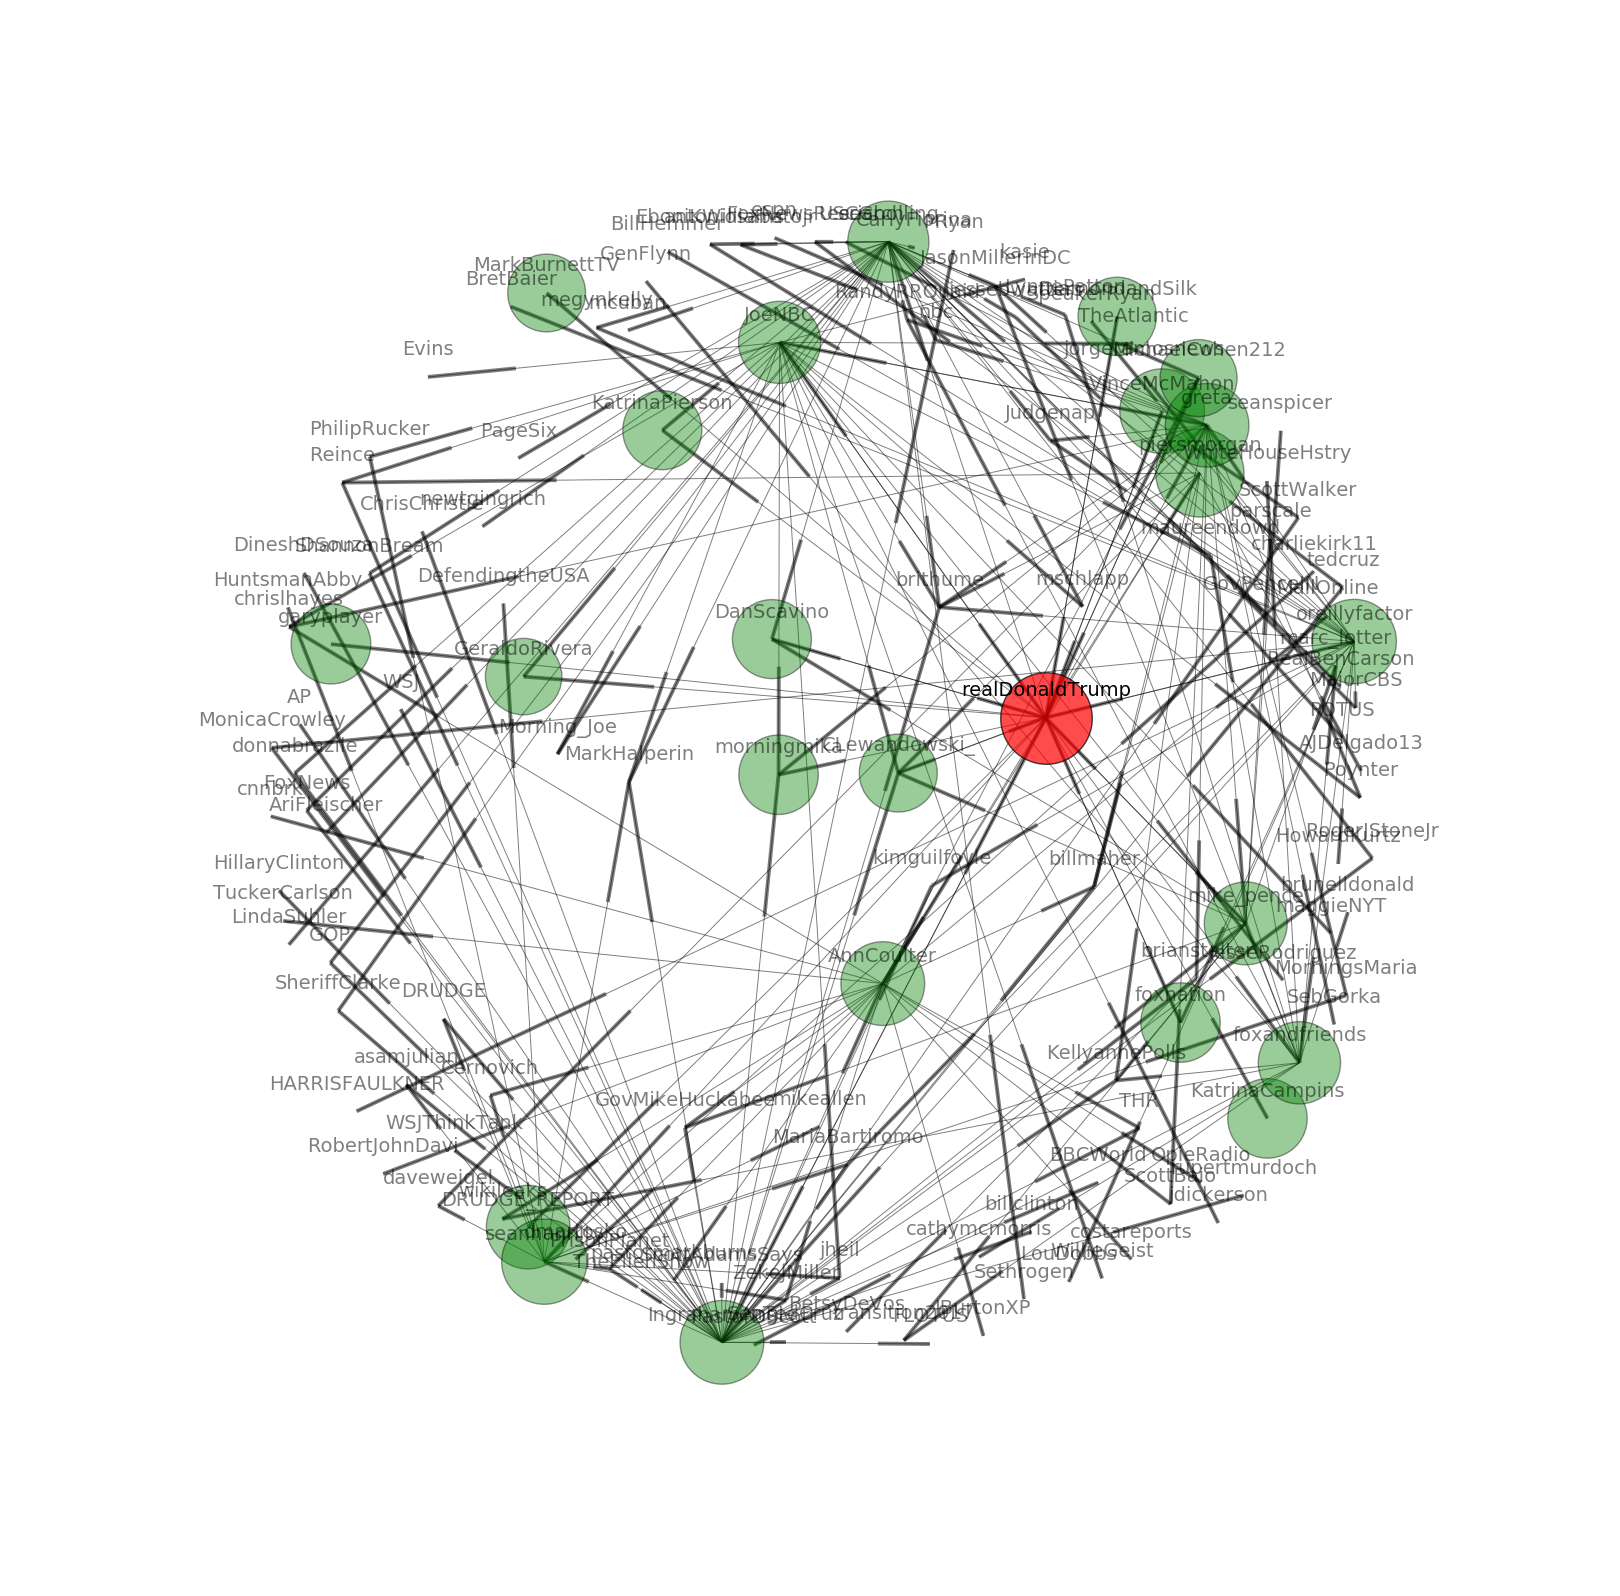

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (21, 14)
%run ./visualize.py

***

## Appendix A: Get Friends Code <a id='Appendix_A'></a>
  
This code grabs 200 followers for each of Trump's friends and puts it in a "followers" folder for later processing. requires folders named "followers" and "twitter-users" in the working directory.

In [ ]:
## Adapted from Mark Kay method of graphing followers
## http://mark-kay.net/2014/08/15/network-graph-of-twitter-followers/

import tweepy
import time
import os
import sys
import json
import argparse

FOLLOWING_DIR = 'following'
MAX_FRIENDS = 200
FRIENDS_OF_FRIENDS_LIMIT = 200

if not os.path.exists(FOLLOWING_DIR):
    os.mkdir(FOLLOWING_DIR)

enc = lambda x: x.encode('ascii', errors='ignore')

# The consumer keys can be found on your application's Details
# page located at https://dev.twitter.com/apps (under "OAuth settings")
CONSUMER_KEY = ''
CONSUMER_SECRET = ''

# The access tokens can be found on your applications's Details
# page located at https://dev.twitter.com/apps (located
# under "Your access token")
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''

# == OAuth Authentication ==
#
# This mode of authentication is the new preferred way
# of authenticating with Twitter.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

def get_follower_ids(centre, max_depth=1, current_depth=0, taboo_list=[]):

    # print 'current depth: %d, max depth: %d' % (current_depth, max_depth)
    # print 'taboo list: ', ','.join([ str(i) for i in taboo_list ])

    if current_depth == max_depth:
        print 'out of depth'
        return taboo_list

    if centre in taboo_list:
        # we've been here before
        print 'Already been here.'
        return taboo_list
    else:
        taboo_list.append(centre)

    try:
        userfname = os.path.join('twitter-users', str(centre) + '.json')
        if not os.path.exists(userfname):
            print 'Retrieving user details for twitter id %s' % str(centre)
            while True:
                try:
                    user = api.get_user(centre)

                    d = {'name': user.name,
                         'screen_name': user.screen_name,
                         'id': user.id,
                         'friends_count': user.friends_count,
                         'followers_count': user.followers_count,
                         'followers_ids': user.followers_ids()}

                    with open(userfname, 'w') as outf:
                        outf.write(json.dumps(d, indent=1))

                    user = d
                    break
                except tweepy.TweepError, error:
                    print type(error)

                    if str(error) == 'Not authorized.':
                        print 'Can''t access user data - not authorized.'
                        return taboo_list

                    if str(error) == 'User has been suspended.':
                        print 'User suspended.'
                        return taboo_list

                    errorObj = error[0][0]

                    print errorObj

                    if errorObj['message'] == 'Rate limit exceeded':
                        print 'Rate limited. Sleeping for 15 minutes.'
                        time.sleep(15 * 60 + 15)
                        continue

                    return taboo_list
        else:
            user = json.loads(file(userfname).read())

        screen_name = enc(user['screen_name'])
        fname = os.path.join(FOLLOWING_DIR, screen_name + '.csv')
        friendids = []

        # only retrieve friends of TED ... screen names
        # if screen_name.startswith('R'):
        # changing this so we don't filter on TED
        if screen_name[0].isalpha():
            if not os.path.exists(fname):
                print 'No cached data for screen name "%s"' % screen_name
                with open(fname, 'w') as outf:
                    params = (enc(user['name']), screen_name)
                    print 'Retrieving friends for user "%s" (%s)' % params

                    # page over friends
                    c = tweepy.Cursor(api.friends, id=user['id']).items()

                    friend_count = 0
                    while True:
                        try:
                            friend = c.next()
                            friendids.append(friend.id)
                            params = (friend.id, enc(friend.screen_name), enc(friend.name))
                            outf.write('%s\t%s\t%s\n' % params)
                            friend_count += 1
                            if friend_count >= MAX_FRIENDS:
                                print 'Reached max no. of friends for "%s".' % friend.screen_name
                                break
                        except tweepy.TweepError:
                            # hit rate limit, sleep for 15 minutes
                            print 'Rate limited. Sleeping for 15 minutes.'
                            time.sleep(15 * 60 + 15)
                            continue
                        except StopIteration:
                            break
            else:
                friendids = [int(line.strip().split('\t')[0]) for line in file(fname)]

            print 'Found %d friends for %s' % (len(friendids), screen_name)

            # get friends of friends
            cd = current_depth
            if cd+1 < max_depth:
                for fid in friendids[:FRIENDS_OF_FRIENDS_LIMIT]:
                    taboo_list = get_follower_ids(fid, max_depth=max_depth,
                        current_depth=cd+1, taboo_list=taboo_list)

            if cd+1 < max_depth and len(friendids) > FRIENDS_OF_FRIENDS_LIMIT:
                print 'Not all friends retrieved for %s.' % screen_name

    except Exception, error:
        print 'Error retrieving followers for user id: ', centre
        print error

        if os.path.exists(fname):
            os.remove(fname)
            print 'Removed file "%s".' % fname

        sys.exit(1)

    return taboo_list

if __name__ == '__main__':
    ap = argparse.ArgumentParser()
    ap.add_argument("-s", "--screen-name", required=True, help="Screen name of twitter user")
    ap.add_argument("-d", "--depth", required=True, type=int, help="How far to follow user network")
    args = vars(ap.parse_args())

    twitter_screenname = args['screen_name']
    depth = int(args['depth'])

    if depth < 1 or depth > 3:
        print 'Depth value %d is not valid. Valid range is 1-3.' % depth
        sys.exit('Invalid depth argument.')

    print 'Max Depth: %d' % depth
    matches = api.lookup_users(screen_names=[twitter_screenname])

    if len(matches) == 1:
        print get_follower_ids(matches[0].id, max_depth=depth)
    else:
        print 'Sorry, could not find twitter user with screen name: %s' % twitter_screenname


## Appendix B: Get Network Code <a id='Appendix_B'></a>

This code creates an edge list of connections from Trump's friends to other friends weighted by the number of followers each friend has. The data is stored in the .csv file "twitter-network.csv".

In [ ]:
import glob
import os
import json
import sys
from collections import defaultdict

users = defaultdict(lambda: { 'followers': 0 })

for f in glob.glob('twitter-users/*.json'):
    data = json.load(file(f))
    screen_name = data['screen_name']
    users[screen_name] = { 'followers': data['followers_count'] }

SEED = 'realDonaldTrump'

def process_follower_list(screen_name, edges=[], depth=0, max_depth=2):
    f = os.path.join('following', screen_name + '.csv')

    if not os.path.exists(f):
        return edges

    followers = [line.strip().split('\t') for line in file(f)]

    for follower_data in followers:
        if len(follower_data) < 2:
            continue

        screen_name_2 = follower_data[1]

        # use the number of followers for screen_name as the weight
        weight = users[screen_name]['followers']

        edges.append([screen_name, screen_name_2, weight])

        if depth+1 < max_depth:
            process_follower_list(screen_name_2, edges, depth+1, max_depth)

    return edges

edges = process_follower_list(SEED, max_depth=3)

with open('twitter_network.csv', 'w') as outf:
    edge_exists = {}
    for edge in edges:
        key = ','.join([str(x) for x in edge])
        if not(key in edge_exists):
            outf.write('%s\t%s\t%d\n' % (edge[0], edge[1], edge[2]))
            edge_exists[key] = True


## Appendix C: Create and Plot Network Graph  <a id='Appendix_C'></a>
This code makes a NetworkX diGraph and plots it to the Jupyter Notebook. The code allows for twe1aks to prune the network and make the plot more readable. 

In [ ]:
import networkx as net
import matplotlib.pyplot as plt

from collections import defaultdict
import math

twitter_network = [ line.strip().split('\t') for line in file('twitter_network.csv') ]

o = net.DiGraph()
hfollowers = defaultdict(lambda: 0)
for (twitter_user, followed_by, followers) in twitter_network:
    o.add_edge(twitter_user, followed_by, followers=int(followers))
    hfollowers[twitter_user] = int(followers)

SEED = 'realDonaldTrump'

# centre around the SEED node and set radius of graph
g = net.DiGraph(net.ego_graph(o, SEED, radius=4))

def trim_degrees_trump(g, degree=10, trump_degree=1):
    g2 = g.copy()
    d = net.degree(g2)
    for n in g2.nodes():
        if n == SEED: continue # don't prune the SEED node
        if d[n] <= degree and n.lower().find('trump') != -1:
            g2.remove_node(n)
        elif n.lower().find('trump') == -1 and d[n] <= trump_degree:
            g2.remove_node(n)
    return g2

def trim_edges_trump(g, weight=1, trump_weight=10):
    g2 = net.DiGraph()
    for f, to, edata in g.edges_iter(data=True):
        if f == SEED or to == SEED: # keep edges that link to the SEED node
            g2.add_edge(f, to, edata)
        elif f.lower().find('trump') != -1 or to.lower().find('trump') != -1:
            if edata['followers'] >= trump_weight:
                g2.add_edge(f, to, edata)
        elif edata['followers'] >= weight:
            g2.add_edge(f, to, edata)
    return g2

print 'g: ', len(g)
core = trim_degrees_trump(g, degree=235, trump_degree=2)
print 'core after node pruning: ', len(core)
# core = trim_edges_trump(core, weight=250000, trump_weight=35000)
core = trim_edges_trump(core, weight=400000, trump_weight=10)
print 'core after edge pruning: ', len(core)

# nodeset_types = { 'TED': lambda s: s.lower().startswith('ted'), 'Not TED': lambda s: not s.lower().startswith('ted') }
nodeset_types = { 'Trump': lambda s: s.lower().find('trump') != -1, 'Not Trump': lambda s: s.lower().find('trump') == -1 }

nodesets = defaultdict(list)

for nodeset_typename, nodeset_test in nodeset_types.iteritems():
    nodesets[nodeset_typename] = [ n for n in core.nodes_iter() if nodeset_test(n) ]

pos = net.spring_layout(core,k=0.20,iterations=20) # compute layout

colours = ['red','green']
colourmap = {}

plt.figure(figsize=(20,20))
plt.axis('off')

# draw nodes
i = 0
alphas = {'Trump': 0.7, 'Not Trump': 0.4}
for k in nodesets.keys():
    ns = [ math.log10(hfollowers[n]+1) * 600 for n in nodesets[k] ]
    print k, len(ns)
    net.draw_networkx_nodes(core, pos, nodelist=nodesets[k], node_size=ns, node_color=colours[i], alpha=alphas[k])
    colourmap[k] = colours[i]
    i += 1
print 'colourmap: ', colourmap

# draw edges
net.draw_networkx_edges(core, pos, width=0.7, alpha=0.5)

# draw labels
alphas = { 'Trump': 1.0, 'Not Trump': 0.5}
for k in nodesets.keys():
    for n in nodesets[k]:
        x, y = pos[n]
        plt.text(x, y+0.02, s=n, alpha=alphas[k], horizontalalignment='center', fontsize=14)


## Appendix D: Get Friend Profiles <a id='Appendix_D'></a>
The following three code blocks are used to get friend and/or follower profiles and store them in a Python dictionary.

In [ ]:
# creates and stores and authentication file to access Twitter API
## this is set up to use my twitter account and store the authorization file 
## on this machine in the oath_login() file used by other functions

import os
import sys
import twitter

from twitter.oauth import write_token_file, read_token_file
from twitter.oauth_dance import oauth_dance

# Go to http://twitter.com/apps/new to create an app and get these items
# See also http://dev.twitter.com/pages/oauth_single_token

APP_NAME = ''
CONSUMER_KEY = ''
CONSUMER_SECRET = ''


def oauth_login(app_name=APP_NAME,
                consumer_key=CONSUMER_KEY, 
                consumer_secret=CONSUMER_SECRET, 
                token_file='out/twitter.oauth'):

    try:
        (access_token, access_token_secret) = read_token_file(token_file)
    except IOError, e:
        (access_token, access_token_secret) = oauth_dance(app_name, consumer_key,
                consumer_secret)

        if not os.path.isdir('out'):
            os.mkdir('out')

        write_token_file(token_file, access_token, access_token_secret)

        print >> sys.stderr, "OAuth Success. Token file stored to", token_file

    return twitter.Twitter(auth=twitter.oauth.OAuth(access_token, access_token_secret,
                           consumer_key, consumer_secret))

if __name__ == '__main__':

    oauth_login(APP_NAME, CONSUMER_KEY, CONSUMER_SECRET)

In [ ]:
import sys
import time
from urllib2 import URLError
from httplib import BadStatusLine
import json
import twitter

def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw): 
    
    # A nested helper function that handles common HTTPErrors. Return an updated
    # value for wait_period if the problem is a 500 level error. Block until the
    # rate limit is reset if it's a rate limiting issue (429 error). Returns None
    # for 401 and 404 errors, which requires special handling by the caller.
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
    
        if wait_period > 3600: # Seconds
            print >> sys.stderr, 'Too many retries. Quitting.'
            raise e
    
        # See https://dev.twitter.com/docs/error-codes-responses for common codes
    
        if e.e.code == 401:
            print >> sys.stderr, 'Encountered 401 Error (Not Authorized)'
            return None
        elif e.e.code == 404:
            print >> sys.stderr, 'Encountered 404 Error (Not Found)'
            return None
        elif e.e.code == 429: 
            print >> sys.stderr, 'Encountered 429 Error (Rate Limit Exceeded)'
            if sleep_when_rate_limited:
                print >> sys.stderr, "Retrying in 15 minutes...ZzZ..."
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print >> sys.stderr, '...ZzZ...Awake now and trying again.'
                return 2
            else:
                raise e # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print >> sys.stderr, 'Encountered %i Error. Retrying in %i seconds' % \
                (e.e.code, wait_period)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e

    # End of nested helper function
    
    wait_period = 2 
    error_count = 0 

    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError, e:
            error_count = 0 
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError, e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print >> sys.stderr, "URLError encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise
        except BadStatusLine, e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print >> sys.stderr, "BadStatusLine encountered. Continuing."
            if error_count > max_errors:
                print >> sys.stderr, "Too many consecutive errors...bailing out."
                raise



In [ ]:
## 
from functools import partial
from sys import maxint

def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
                              friends_limit=maxint, followers_limit=maxint):
    
    # Must have either screen_name or user_id (logical xor)
    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"
    
    # See https://dev.twitter.com/docs/api/1.1/get/friends/ids and
    # https://dev.twitter.com/docs/api/1.1/get/followers/ids for details
    # on API parameters
    # changed count to 1000 to avoid hitting api limits all the time

    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids, 
                              count=100)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids, 
                                count=5000)

    friends_ids, followers_ids = [], []
    
    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"], 
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:
        
        if limit == 0: continue
        
        cursor = -1
        while cursor != 0:
        
            # Use make_twitter_request via the partially bound callable...
            if screen_name: 
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']
        
            print >> sys.stderr, 'Fetched {0} total {1} ids for {2}'.format(len(ids), 
                                                    label, (user_id or screen_name))
        
            # XXX: You may want to store data during each iteration to provide an 
            # an additional layer of protection from exceptional circumstances
        
            if len(ids) >= limit or response is None:
                break

    # Do something useful with the IDs, like store them to disk...
    return friends_ids[:friends_limit], followers_ids[:followers_limit]

# Sample usage
twitter_api = oauth_login()

# See https://dev.twitter.com/docs/api/1.1/get/users/lookup for 
# twitter_api.users.lookup

response = make_twitter_request(twitter_api.users.lookup, 
                                screen_name="realDonaldTrump")

# print json.dumps(response, indent=1)